In [34]:
import requests
import json
from rdkit import Chem

def smiles_to_formula(smiles):
    molecule = Chem.MolFromSmiles(smiles)
    return Chem.rdMolDescriptors.CalcMolFormula(molecule)


# 获取pubchem的分子属性
def __get_compound_properties(query, query_type='formula'):
    if query_type.lower() == 'formula':
        url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/fastformula/{query}/JSON"
    elif query_type.lower() == 'smiles':
        url = f"https://pubchem.ncbi.nlm.nih.gov/rest/pug/compound/smiles/{query}/JSON"
    else:
        print(f"Invalid query type: {query_type}. Please choose 'formula' or 'smiles'.")
        return None

    response = requests.get(url)

    if response.status_code == 200:
        data = response.json()
        return data
    else:
        return None

def _get_compound_properties(query, query_type='formula'):
    data = __get_compound_properties(query, query_type)
    if data is  None:
        return None
    props = []
    for mole in data['PC_Compounds']:
        prop_dict = {}
        print(mole['id'])
        if mole['id'].get('id') is not None:
            prop_dict['cid'] = mole['id']['id']['cid']
        for prop in data['PC_Compounds'][0]['props']:
            prop_dict[prop['urn']['label']] = prop['value']
        props.append(prop_dict)
    return props
    
#支持的prop_type:
# Compound
# Compound Complexity
# Count
# Fingerprint
# IUPAC Name
# InChI
# InChIKey
# Log P
# Mass
# Molecular Formula
# Molecular Weight
# SMILES
# Topological
# Weight
def get_compound_properties(query, query_type='formula',prop_type='Molecular Weight'):
    props = _get_compound_properties(query, query_type)
    if props is None:
        return "No data found."
    if prop_type == "ALL":
        return props
    return_props = []
    for mole in props:
        prop_dicts = {}
        for i in mole:
            if i == prop_type:
                prop_dicts[i] = mole[i]
        return_props.append(prop_dicts)
    return return_props
    





In [19]:
for i in  ["Compound", "Compound Complexity", "Count", "Fingerprint", "IUPAC Name", "InChI", "InChIKey", "Log P", "Mass", "Molecular Formula", "Molecular Weight", "SMILES", "Topological", "Weight", "ALL"]:
    query = "C9H8O4" 
    query_type = "formula"  # Change this to "smiles" if you have a SMILES string
    data = get_compound_properties(query, query_type,i)
    print(data)

[{'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, {'Compound': {'ival': 1}}, 

KeyboardInterrupt: 

In [36]:
query = "CC1CC(C)(C)OC1C(=O)O" 
query_type = "smiles"  # Change this to "smiles" if you have a SMILES string
data = _get_compound_properties(query, query_type)
print(data)

{}
[{'SMILES': {'sval': 'CC1CC(OC1C(=O)O)(C)C'}, 'InChI': {'sval': 'InChI=1S/C8H14O3/c1-5-4-8(2,3)11-6(5)7(9)10/h5-6H,4H2,1-3H3,(H,9,10)'}}]


In [35]:

cid = data['PC_Compounds'][0]['id']['id']['cid']
prop_dict = {}
for prop in data['PC_Compounds'][0]['props']:
    prop_dict[prop['urn']['label']] = prop['value']

KeyError: 'id'

In [39]:
#不管是ival fval binary还是什么别的，都直接传进来
prop_dicts = {}
for i in prop_dict:
    for j in prop_dict[i]:
        prop_dicts[i] = prop_dict[i][j]

In [40]:
prop_dicts

{'Compound': 1,
 'Compound Complexity': 15.5,
 'Count': 0,
 'Fingerprint': '00000371806000000000000000000000000000000000000000003000000000000000000100000018000000000008008010003000800000008000204200000200002000000888000000880820228011108020002080000888070000000000000000000000000000000000000000000000000000',
 'IUPAC Name': 'benzene',
 'InChI': 'InChI=1S/C6H6/c1-2-4-6-5-3-1/h1-6H',
 'InChIKey': 'UHOVQNZJYSORNB-UHFFFAOYSA-N',
 'Log P': 2.1,
 'Mass': '78.0469501914',
 'Molecular Formula': 'C6H6',
 'Molecular Weight': '78.11',
 'SMILES': 'C1=CC=CC=C1',
 'Topological': 0,
 'Weight': '78.0469501914'}

In [37]:
from generator import GCPN_hydrophobic_molecule_generation
GCPN_hydrophobic_molecule_generation(1)

d:\Anaconda\envs\molecule\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


['CCC(C)(C)CC']

In [2]:
from dash import Dash
from dash_bio.utils import xyz_reader

xyz_reader.read_xyz(('./assets/test.xyz'))

[{'symbol': 'C', 'x': -1.922, 'y': 2.5992, 'z': 0.2229},
 {'symbol': 'C', 'x': -2.5679, 'y': 1.3315, 'z': -0.0189},
 {'symbol': 'N', 'x': -4.0319, 'y': 1.5409, 'z': -0.1909},
 {'symbol': 'C', 'x': -2.2333, 'y': 0.091, 'z': -0.1289},
 {'symbol': 'C', 'x': -3.2936, 'y': -0.8148, 'z': -0.3759},
 {'symbol': 'C', 'x': -3.0665, 'y': -2.1566, 'z': -0.4694},
 {'symbol': 'C', 'x': -1.811, 'y': -2.653, 'z': -0.3267},
 {'symbol': 'C', 'x': -0.7286, 'y': -1.8119, 'z': -0.0843},
 {'symbol': 'C', 'x': -0.943, 'y': -0.4607, 'z': 0.0106},
 {'symbol': 'C', 'x': 0.0636, 'y': 0.362, 'z': 0.1524},
 {'symbol': 'C', 'x': 1.4634, 'y': 0.1306, 'z': 0.3223},
 {'symbol': 'C', 'x': 2.24, 'y': -0.8757, 'z': 0.4106},
 {'symbol': 'C', 'x': 3.6962, 'y': -0.5537, 'z': 0.5904},
 {'symbol': 'N', 'x': 4.7095, 'y': -1.3997, 'z': 0.7101},
 {'symbol': 'N', 'x': 5.8253, 'y': -0.7163, 'z': 0.8503},
 {'symbol': 'C', 'x': 5.5079, 'y': 0.5721, 'z': 0.8181},
 {'symbol': 'N', 'x': 4.1608, 'y': 0.6903, 'z': 0.6537},
 {'symbol': 'H

In [3]:
from utils import combine_molecules
combine_molecules("C","CC",0,0)

d:\Anaconda\envs\molecule\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'C.CC'

In [5]:
from rdkit.Chem import AllChem as Chem
molecule1 = Chem.MolFromSmiles("CC(=O)O")
molecule2 = Chem.MolFromSmiles("NC")

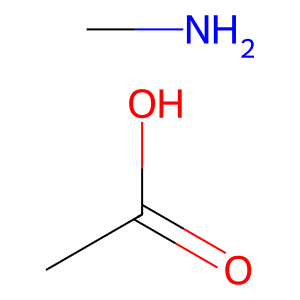

In [12]:
rxn = Chem.ReactionFromSmarts('[*:1].[*:2]>>([*:1].[*:2])')
pr = rxn.RunReactants((molecule1, molecule2))
Chem.SanitizeMol(pr[0][0])
Chem.Draw.MolToImage(pr[0][0])

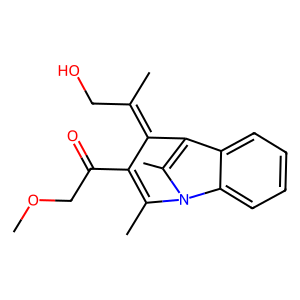

In [7]:
from rdkit.Chem import AllChem as Chem
Chem.Draw.MolToImage(Chem.MolFromSmiles("COCC(=O)C1=C(C)N2C3=CC=CC=C3C(=C2C)C1=C(C)CO"))

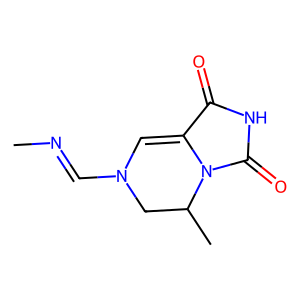

In [2]:
Chem.Draw.MolToImage(Chem.MolFromSmiles(" CN=CN1C=C2C(=O)NC(=O)N2C(C)C1"))

In [6]:
from rdkit import Chem
import numpy as np
from rdkit.Chem import QED, Descriptors, rdMolDescriptors
from rdkit import Chem
from scipy.stats import gaussian_kde
import rdkit
 
 
def cal_mol_props(smi, verbose=False):
    try:
        m = Chem.MolFromSmiles(smi)
        if not m:
            return None, None, None, None, None, None, None, None, None
 
        logp = np.round(Descriptors.MolLogP(m), 2)
        tpsa = np.round(Descriptors.TPSA(m), 1)
        mw = np.round(Descriptors.MolWt(m), 1)
        qed = np.round(QED.qed(m), 2)
        hba = rdMolDescriptors.CalcNumLipinskiHBA(m)
        hbd = rdMolDescriptors.CalcNumLipinskiHBD(m)
        rob = rdMolDescriptors.CalcNumRotatableBonds(m)
        chiral_center = len(Chem.FindMolChiralCenters(m, includeUnassigned=True))
 
        # 计算Bertz CT的数据分布的直方图
        bertz_ct = Descriptors.BertzCT(m)
 
 
        if verbose:
            print(smi)
            print('MW ', mw)
            print('HBD ', hbd)
            print('HBA ', hba)
            print('Logp ', logp)
            print('RotB ', rob)
            print('QED ', qed)
            print('chiral_center ', chiral_center)
            print('TPSA ', tpsa)
            print('bertz_ct', bertz_ct)
 
        return logp, tpsa, mw, qed, hba, hbd, rob, chiral_center, bertz_ct,"分子的SMILES表示为：{}，其各项性质如下：\n\
分子量（MW）：{}\n\
氢键供体数（HBD）：{}\n\
氢键受体数（HBA）：{}\n\
LogP值：{}\n\
可旋转键数（RotB）：{}\n\
QED分数：{}\n\
手性中心数：{}\n\
极性表面积（TPSA）：{}\n\
BertzCT：{}".format(smi, mw, hbd, hba, logp, rob, qed, chiral_center, tpsa, bertz_ct)
 
    except Exception as e:
        print(e)
        return None, None, None, None, None, None, None, None, None, None
 
 
SMILES = 'CCCc1ccc(Cc2sc3c(c2C(=O)NC(C)c2ccc(C(=O)O)cc2)CCOC3)cc1'
logp, tpsa, mw, qed, hba, hbd, rob, chiral_center, bertz_ct, word = cal_mol_props(SMILES, verbose=False)
print(word)

分子的SMILES表示为：CCCc1ccc(Cc2sc3c(c2C(=O)NC(C)c2ccc(C(=O)O)cc2)CCOC3)cc1，其各项性质如下：
分子量（MW）：463.6
氢键供体数（HBD）：2
氢键受体数（HBA）：5
LogP值：5.55
可旋转键数（RotB）：8
QED分数：0.46
手性中心数：1
极性表面积（TPSA）：75.6
BertzCT：1132.1780914913627


In [17]:
from generator import GCPN_simple_molecule_generation
moles = GCPN_simple_molecule_generation(50)
mole_qed = []
for i in moles:
    mole_qed.append(cal_mol_props(i, verbose=False)[3])
#排序，找到top-1的位置
mole_qed = np.array(mole_qed)
mole_qed = np.argsort(mole_qed)
moles[mole_qed[0]]


'C=C1CCCCC(=CC)C23C=C1S14C=CC2=C1C(C)=CC(Br)=CC=C(C)C=C34'

In [13]:
mole_qed

[0.45,
 0.36,
 0.47,
 0.5,
 0.5,
 0.42,
 0.37,
 0.53,
 0.53,
 0.53,
 0.53,
 0.47,
 0.42,
 0.49,
 0.52,
 0.5,
 0.51,
 0.51,
 0.62,
 0.55,
 0.45,
 0.53,
 0.57,
 0.62,
 0.61,
 0.49,
 0.51,
 0.49,
 0.62,
 0.6,
 0.62,
 0.57,
 0.7,
 0.76,
 0.59,
 0.63,
 0.66,
 0.75,
 0.75,
 0.71,
 0.56,
 0.78,
 0.81,
 0.79,
 0.8,
 0.76,
 0.54,
 0.58,
 0.9,
 0.9]